In [101]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation,Layer,Lambda
from keras.models import Sequential
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf

In [102]:
pd.set_option("max_columns", 300)

In [103]:
# Importing the dataset
df_all= pd.read_csv("C:/Users/win10/Desktop/DATA SCIENCE/ExcelR/Assignment Given (Untouched)/13)Neural Network/forestfires.csv")

In [104]:
type(df_all)

pandas.core.frame.DataFrame

In [105]:
df=df_all[["month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain","area","size_category"]]

In [106]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [107]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [108]:
# We can see. There is no missing values & Looks like the dataset is already applied by one hot encoding for categorical variable.
# Lets label encode the column "size category"
# Also lets remove the encoded columns & lets label encode the month & day columns

In [109]:
df["size_category"]=df["size_category"].map({"small":0, "large":1})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [111]:
# lets label encode the columns "month" & "day".

In [112]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["month"]=encoder.fit_transform(df["month"])
df["day"]=encoder.fit_transform(df["day"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [115]:
target=np.array(df["area"])

In [116]:
# target=df["area"]

In [117]:
# target.shape

In [118]:
predictors=df.drop("area",axis=1)

In [119]:
predictors

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,1
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0


In [120]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(predictors, target, random_state=42,test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42,test_size=0.2)

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [122]:
np.random.seed(42)
tf.random.set_seed(42)

In [123]:
X_train.shape

(330, 11)

In [124]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[11]),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(1)
])
# keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:])

In [125]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                360       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

In [135]:
model_history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Train on 330 samples, validate on 83 samples
Epoch 1/50
330/330 [==============================] - 0s 140us/sample - loss: 3129.7961 - mae: 14.3318 - val_loss: 421.5696 - val_mae: 6.1897
Epoch 2/50
330/330 [==============================] - 0s 136us/sample - loss: 2625.4982 - mae: 12.9614 - val_loss: 394.3930 - val_mae: 6.3036
Epoch 3/50
330/330 [==============================] - 0s 136us/sample - loss: 2565.6670 - mae: 13.1220 - val_loss: 387.9713 - val_mae: 6.8158
Epoch 4/50
330/330 [==============================] - 0s 125us/sample - loss: 2544.6181 - mae: 13.5139 - val_loss: 385.8262 - val_mae: 8.1005
Epoch 5/50
330/330 [==============================] - 0s 130us/sample - loss: 2523.9748 - mae: 14.9308 - val_loss: 381.1937 - val_mae: 8.2110
Epoch 6/50
330/330 [==============================] - 0s 133us/sample - loss: 2496.7864 - mae: 14.8734 - val_loss: 387.9572 - val_mae: 9.1618
Epoch 7/50
330/330 [==============================] - 0s 118us/sample - loss: 2447.1655 - mae: 15.0263 

In [128]:
mae_test = model.evaluate(X_test, y_test)

104/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [136]:
model_history.history

{'loss': [3129.796054539536,
  2625.498180782434,
  2565.66700666023,
  2544.6180938258317,
  2523.974807253751,
  2496.786395078717,
  2447.1655441746566,
  2421.6598773378314,
  2328.9132294625947,
  2175.510387732766,
  2370.0120320175633,
  2173.4692815607245,
  2305.5749322139854,
  2059.073984596946,
  2035.632365093809,
  2256.677285119259,
  2052.9777555523497,
  2029.0262076637962,
  2185.0161946267795,
  1803.8741843483665,
  2390.3491420977043,
  1969.3301137981994,
  2204.706328051018,
  2700.6901572487573,
  2420.4481166955197,
  2289.4441435842805,
  2117.3178770123104,
  1990.200176447088,
  3421.420660677823,
  2420.145250967777,
  2328.1531355424363,
  2288.514542643229,
  2231.1122247869316,
  2212.580967573686,
  2150.495169240778,
  2074.478061098041,
  2012.5034759492585,
  1961.1080492019653,
  2091.471261689157,
  1695.89868034594,
  1670.5397563587535,
  1472.6372041644472,
  1728.585185842803,
  2542.707504827326,
  2513.3537538470646,
  2507.871928174568,
  25

In [146]:
from sklearn.metrics import r2_score

In [147]:
r2_score(y_test,model.predict(X_test))

-0.009909856816753049

In [137]:
y_test[100]

5.38

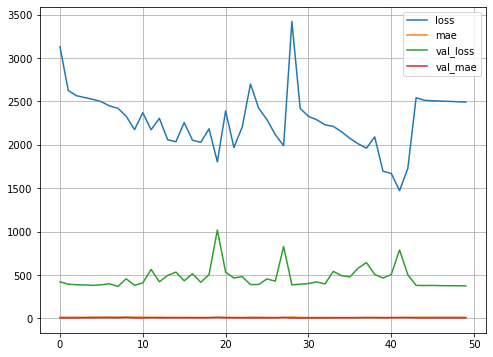

In [142]:
# pd.DataFrame(model_history.history).plot(figsize=(8, 6))
# plt.grid(True)
# # plt.gca().set_ylim(0,1)
# plt.show()

In [ ]:
# del model

In [ ]:
# keras.backend.clear_session()